# Data Preprocessing Notebook
### Team 10

## Data Preprocessing


In [241]:
# Importing the essential libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import random
from collections import Counter

import matplotlib.pyplot as plt



In [188]:
df1 =  pd.read_csv('../covid-19-data-resource-hub-covid-19-case-counts/COVID-19 Cases.csv')

In [189]:
df1.head()

,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,Combined_Key,FIPS,Lat,Long,Table_Names,Prep_Flow_Runtime
0,Deaths,0,0.0,2/27/2020,Bahamas,NaN,NaN,NaN,NaN,25.0343,-77.3963,Time Series,4/5/2020 8:56:44 PM
1,Confirmed,16,0.0,2/16/2020,Germany,NaN,NaN,NaN,NaN,51.0000,9.0000,Time Series,4/5/2020 8:56:44 PM
2,Deaths,0,0.0,1/31/2020,Canada,Alberta,NaN,NaN,NaN,53.9333,-116.5765,Time Series,4/5/2020 8:56:44 PM
3,Deaths,0,0.0,3/4/2020,Australia,Queensland,NaN,NaN,NaN,-28.0167,153.4000,Time Series,4/5/2020 8:56:44 PM
4,Confirmed,0,0.0,1/25/2020,Suriname,NaN,NaN,NaN,NaN,3.9193,-56.0278,Time Series,4/5/2020 8:56:44 PM


In [204]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526200 entries, 0 to 526199
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Case_Type           526200 non-null  object        
 1   Cases               526200 non-null  int64         
 2   Difference          519184 non-null  float64       
 3   Date                526200 non-null  datetime64[ns]
 4   Country_Region      526200 non-null  object        
 5   Province_State      499500 non-null  object        
 6   County_name_USonly  486900 non-null  object        
 7   Combined_Key        487650 non-null  object        
 8   FIPS                487350 non-null  float64       
 9   Lat                 526050 non-null  float64       
 10  Long                526050 non-null  float64       
 11  Table_Names         526200 non-null  object        
 12  Prep_Flow_Runtime   526200 non-null  object        
dtypes: datetime64[ns](1), float64

In [199]:
df1.isnull().sum()

Case_Type                 0
Cases                     0
Difference             7016
Date                      0
Country_Region            0
Province_State        26700
County_name_USonly    39300
Combined_Key          38550
FIPS                  38850
Lat                     150
Long                    150
Table_Names               0
Prep_Flow_Runtime         0
dtype: int64

In [192]:
df1.fillna(np.NaN,inplace = True)

In [196]:
df1.Long.dropna(inplace = True)
df1.Lat.dropna(inplace = True)

In [205]:
## We are dropiing the unnecessay columns from the dataset.
df1.drop(['Combined_Key','FIPS','Table_Names','Prep_Flow_Runtime'],inplace = True,axis =1)

In [206]:
# Renaminig the Column Admin2, to make it wasy to understand.
df1.rename(columns={"Admin2": "County_name_USonly"},inplace = True)

In [207]:
df1.Date =pd.to_datetime(df1.Date)

In [208]:
#Creating a list of all countries and continents.
asia = ['Afghanistan', 'Bahrain', 'United Arab Emirates','Saudi Arabia', 'Kuwait', 'Qatar', 'Oman','Thailand'
'Sultanate of Oman','Lebanon', 'Iraq', 'Yemen', 'Pakistan', 'Lebanon', 'Philippines', 'Jordan','India','China','Mauritius']

europe = ['Germany','Spain', 'France', 'Italy', 'Netherlands', 'Norway', 'Sweden','Czech Republic', 'Finland',
'Denmark', 'Czech Republic', 'Switzerland', 'UK', 'UK&I', 'Poland', 'Greece','Austria',
'Bulgaria', 'Hungary', 'Luxembourg', 'Romania' , 'Slovakia', 'Estonia', 'Slovenia','Portugal',
'Croatia', 'Lithuania', 'Latvia','Serbia', 'Estonia', 'ME', 'Iceland' ]

africa = ['Morocco', 'Tunisia', 'South Africa','Africa', 'ZA', 'Kenya','Reunion Island','Libya','St Helena','Comoros',
          'Reunion','Cape Verde','mozambique']

australia = ['Australia','New Caledonia','New Caledonia','Solomon Islands', 'New Zealand', 'French Polynesia', 'Samoa', 'Fiji']

north_america = ['Argentina', 'Cayman Islands', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay',
'Peru', 'Suriname', 'Uruguay', 'Venezuela', 'Antigua and Barbuda', 'Bahamas', 'Barbados',
'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala',
'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia',
'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'USA']

south_america = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay',
'Peru', 'Suriname', 'Uruguay', 'Venezuela']


list_of_continents=['Asia','Europe','Africa','Australia','North America', 'South America']



In [209]:
#Function to segregate countries into continents
def get_continent(country):
    if country in asia:
        return "Asia"
    elif country in europe:
        return "Europe"
    elif country in africa:
        return "Africa"
    elif country in australia:
        return "Australia"
    elif country in north_america:
        return "North America"
    elif country in south_america:
        return "South America"
    else:
        return (np.random.choice(list_of_continents))

#Applying get_continent function to dataset to group data into continents
df1['Continent'] = df1['Country_Region'].apply(lambda x: get_continent(x))

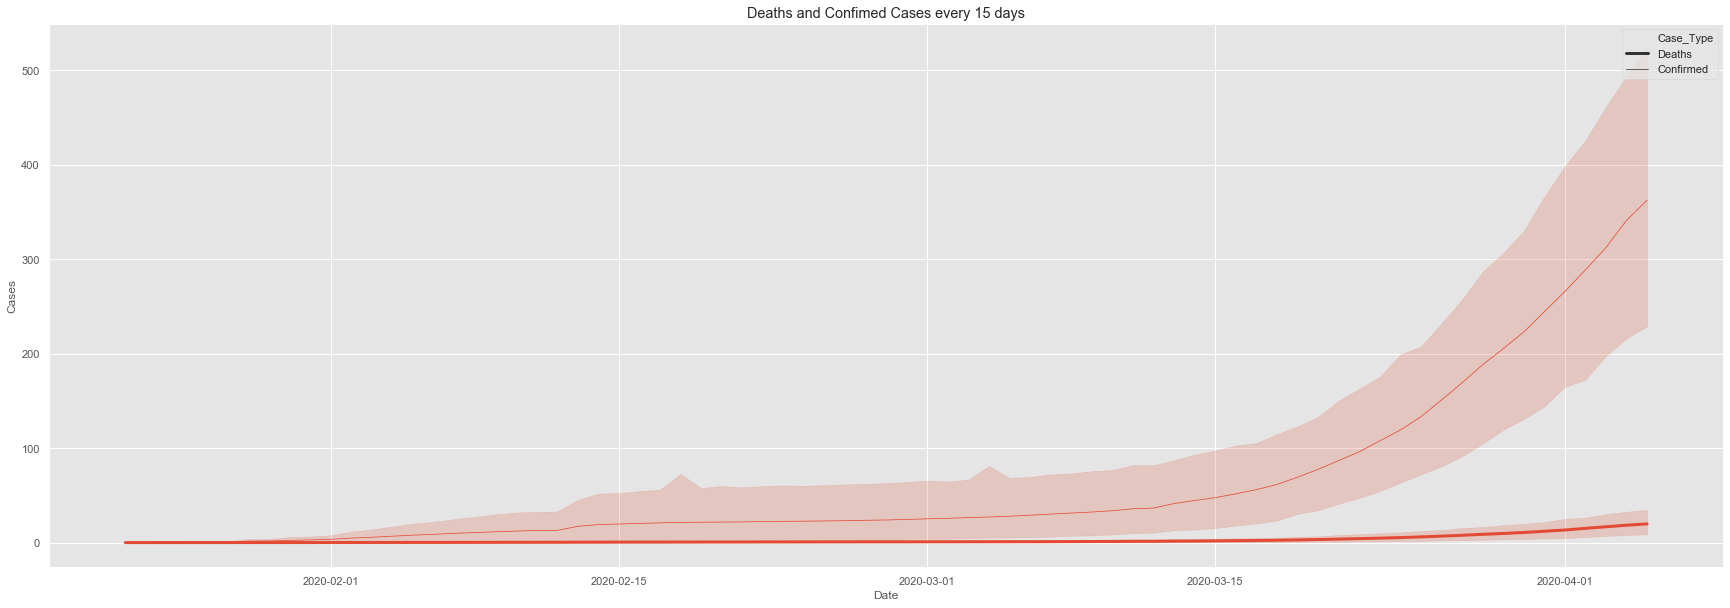

In [242]:
# Analysis of the Deaths and Confimed Cases every 15 days
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(30,10))
plt.title("Deaths and Confimed Cases every 15 days")
sns.lineplot(x='Date',y ='Cases',size='Case_Type',data=df1,ax=ax)

In [211]:
df1.Case_Type.value_counts()

Deaths       263100
Confirmed    263100
Name: Case_Type, dtype: int64

## Visualizations

Text(0.5, 0, 'Number of Cases')

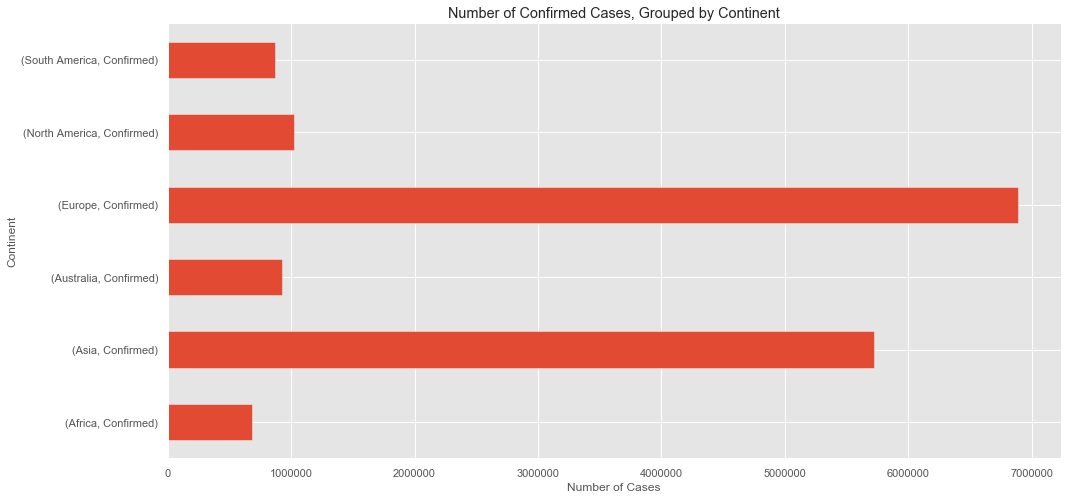

In [234]:
#Plotting the number of attacks grouped by Continent and Fatalities
plt.figure(figsize=(16, 8))
df1[df1.Case_Type == 'Confirmed'].groupby(['Continent', 'Case_Type']).sum()['Cases'].plot(kind='barh',
                                                              title='Number of Confirmed Cases, Grouped by Continent')
plt.ylabel('Continent')
plt.xlabel('Number of Cases')

Text(0.5, 0, 'Number of Cases')

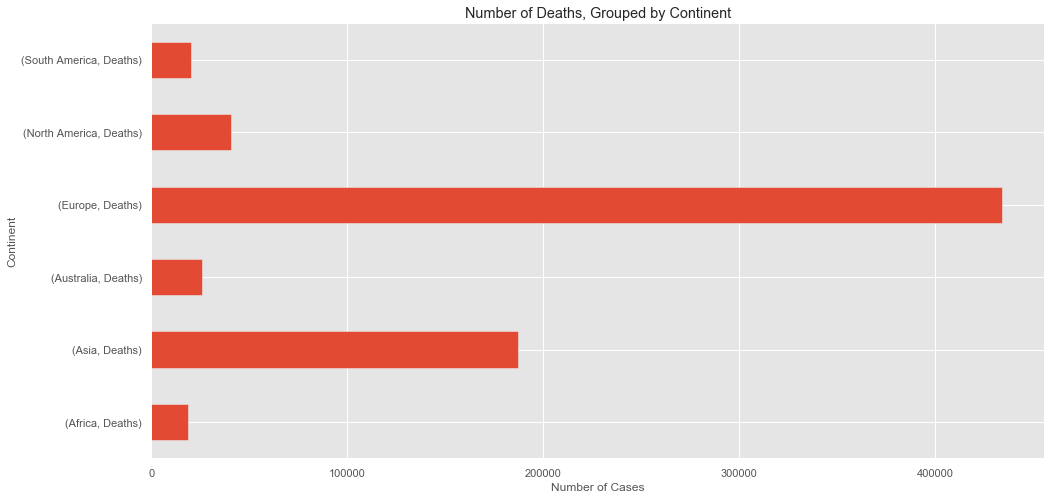

In [235]:
#Plotting the number of attacks grouped by Continent and Fatalities
plt.figure(figsize=(16, 8))
df1[df1.Case_Type == 'Deaths'].groupby(['Continent', 'Case_Type']).sum()['Cases'].plot(kind='barh',
                                                              title='Number of Deaths, Grouped by Continent')
plt.ylabel('Continent')
plt.xlabel('Number of Cases')

Text(0.5, 0, 'Number of Cases')

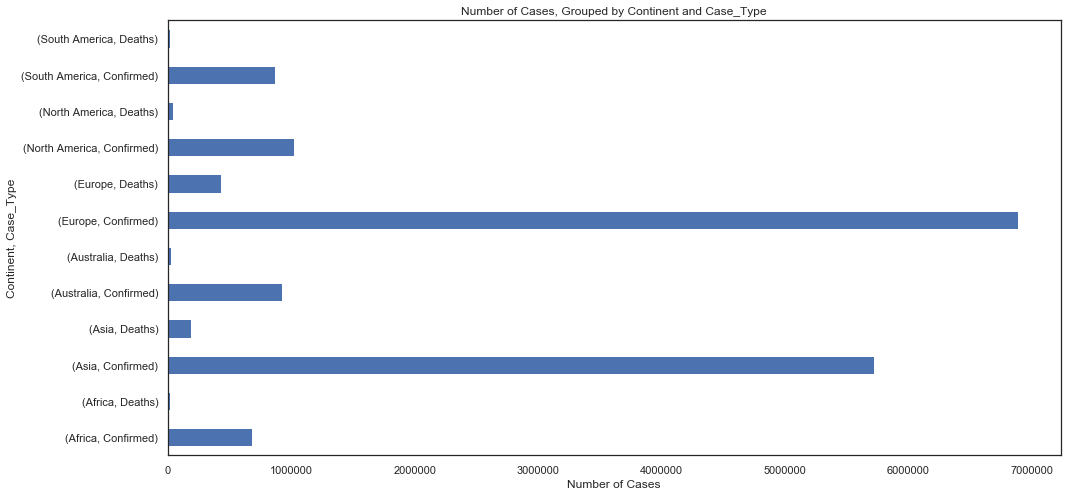

In [221]:
#Plotting the number of attacks grouped by Continent and Fatalities
plt.figure(figsize=(16, 8))
df1.groupby(['Continent', 'Case_Type']).sum()['Cases'].plot(kind='barh',
                                                              title='Number of Cases, Grouped by Continents and Case_Type')
plt.ylabel('Continent, Case_Type')
plt.xlabel('Number of Cases')

Text(0.5, 1.0, 'Deaths Vs Confirmed Cases all over the World')

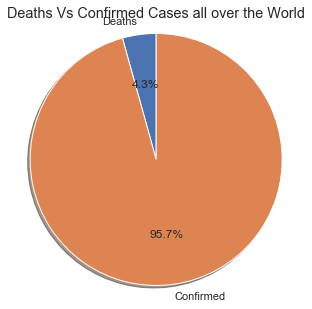

In [238]:
sns.set(style="white")
sns.color_palette("deep")
sns.set_color_codes("deep")

Cases_vals = [df1[(df1.Case_Type == 'Deaths')].Cases.sum(),df1[df1.Case_Type == 'Confirmed'].Cases.sum()]
f, ax = plt.subplots(figsize=(5, 5))
labels = ['Deaths', 'Confirmed']
plt.pie(Cases_vals, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
axis = plt.axis('equal')
plt.style.use(('ggplot'))
plt.title('Deaths Vs Confirmed Cases all over the World')

Text(0.5, 0, 'Number of Cases')

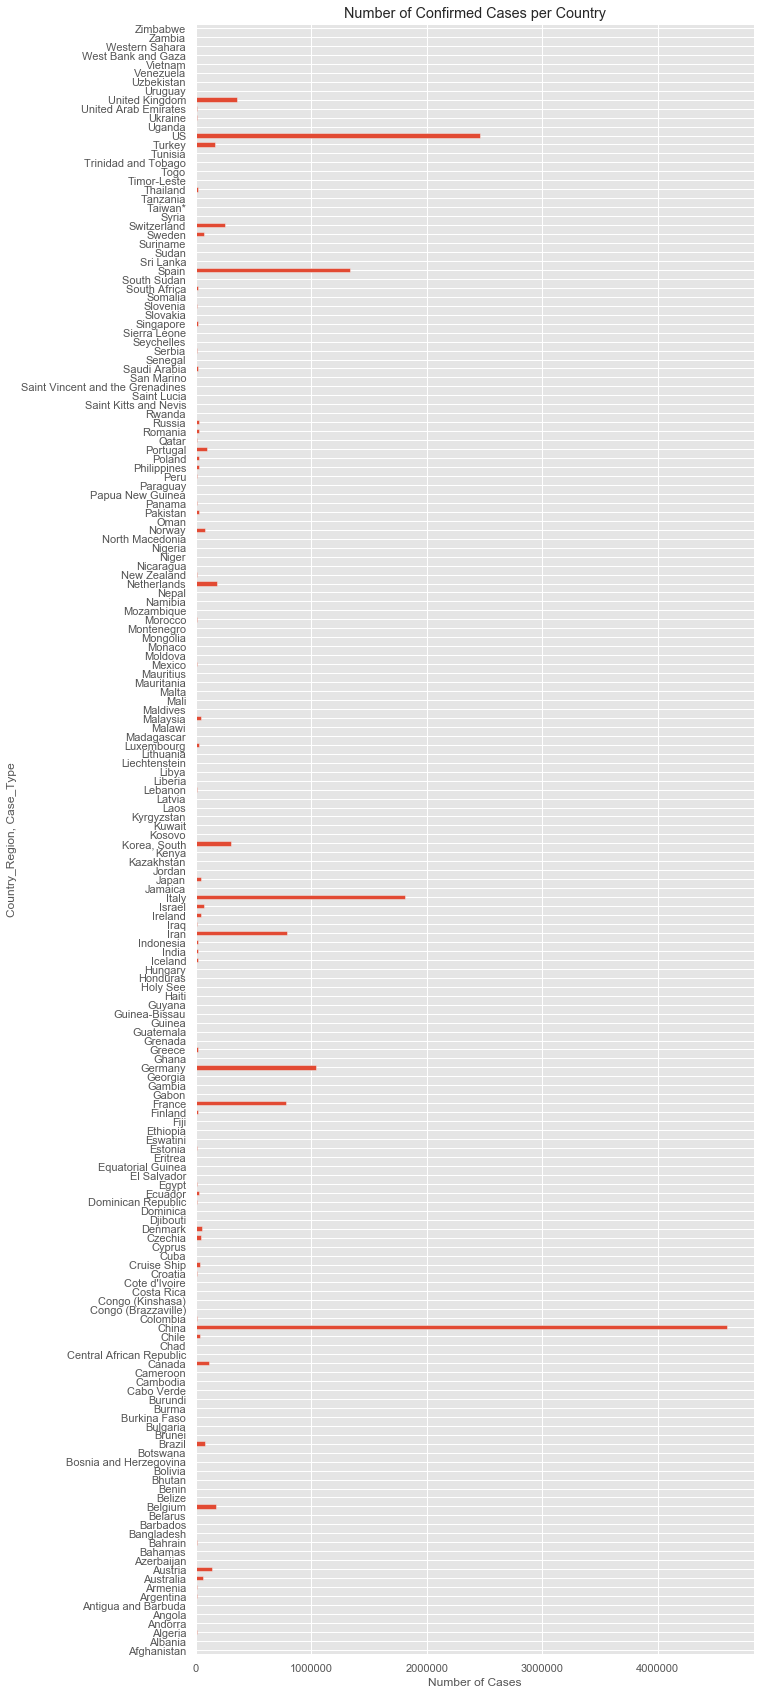

In [239]:
#Plotting the number of attacks grouped by Continent and Fatalities
plt.figure(figsize=(10,30))
df1[df1.Case_Type == 'Confirmed'].groupby(['Country_Region']).sum()['Cases'].plot(kind='barh',
                                                              title='Number of Confirmed Cases per Country')
plt.ylabel('Country_Region, Case_Type')
plt.xlabel('Number of Cases')

Text(0.5, 0, 'Number of Cases')

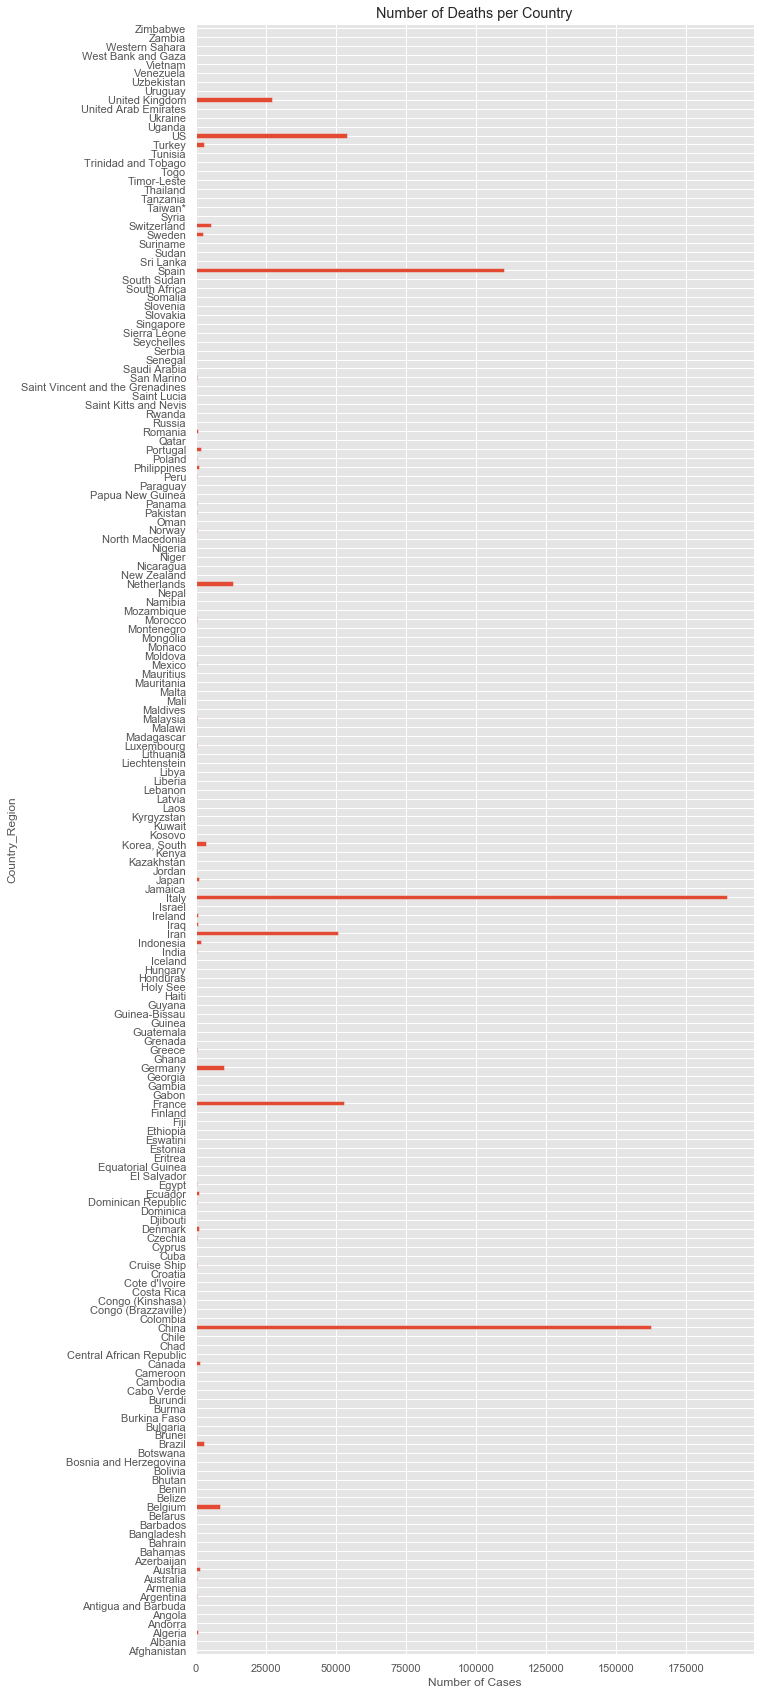

In [240]:
#Plotting the number of attacks grouped by Continent and Fatalities
plt.figure(figsize=(10,30))
df1[df1.Case_Type == 'Deaths'].groupby(['Country_Region']).sum()['Cases'].plot(kind='barh',
                                                              title='Number of Deaths per Country')
plt.ylabel('Country_Region')
plt.xlabel('Number of Cases')